In [16]:
import mysql.connector
mydb = mysql. connector. connect(
    host='localhost',
    user='root',
    password='12345',
    database='HR_DATA'
)
mycursor = mydb.cursor()
mycursor.execute("show databases")
data = mycursor.fetchall()
data

[('hr_data',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]

# select employees education level

In [18]:
mycursor.execute("select * from educationlevel")
data = mycursor.fetchall()
data

[(1, 'No Formal Qualifications'),
 (2, 'High School '),
 (3, 'Bachelors '),
 (4, 'Masters '),
 (5, 'Doctorate'),
 (1, 'No Formal Qualifications'),
 (2, 'High School '),
 (3, 'Bachelors '),
 (4, 'Masters '),
 (5, 'Doctorate')]

# Select total count of employees in HR department 

In [25]:
mycursor.execute("select count(EmployeeID) from employee")
data = mycursor.fetchall()
data [0][0]
"Total number of employees count in HR Department are " , data [0][0]

('Total number of employees count in HR Department are ', 2940)

# Select count of employees gender wise 

In [27]:
mycursor.execute("select count(EmployeeID),gender from employee group by gender")
data = mycursor.fetchall()
data                 

[(1350, 'Female'),
 (1302, 'Male'),
 (248, 'Non-Binary'),
 (40, 'Prefer Not To Say')]

In [52]:
import pandas as pd
import seaborn as sns
sns.set(color_codes= True)
import matplotlib.pyplot as plt

# select count of employees education level wise 

In [53]:
mycursor.execute("select count(employee.EmployeeID),educationlevel.EducationLevel from employee join educationlevel  on employee.Education = educationlevel.EducationLevelID group by educationlevel.EducationLevel")
data = mycursor.fetchall()
df = pd.DataFrame(data)
df

,0,1
0,192,Doctorate
1,1592,Masters
2,2288,Bachelors
3,1128,High School
4,680,No Formal Qualifications


In [56]:
# select count of employees education level wise - bar chart

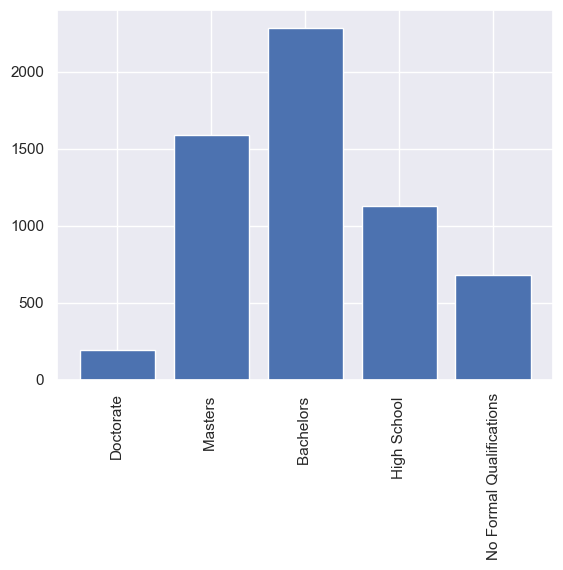

In [57]:
mycursor.execute("select educationlevel.EducationLevel,count(employee.EmployeeID)  from employee join educationlevel  on employee.Education = educationlevel.EducationLevelID group by educationlevel.EducationLevel")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns = ["EducationLevel","COUNT_EMPLOYEE"])
plt.bar(df["EducationLevel"],df["COUNT_EMPLOYEE"])
plt.xticks(rotation = 90)
plt.show()